In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import prim
import seaborn as sns
#from sklearn import mixture
import os
#from clustering_and_prim_tools import *

In [3]:
%matplotlib inline

In [4]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [5]:
myfolder = "C:/Users/WB451855/OneDrive - WBG/!infra_needs_data/energy_iiasa_output_data/"

In [7]:
capa_data = pd.read_excel(myfolder+"analysis IIASA august2.xlsx","Non_Investment_Annual_2030")

In [8]:
capa_data.columns

Index(['Model', 'Region', 'Scenario', 'Variable', 'Unit', 2015, 2020, 2025,
       2030],
      dtype='object')

In [12]:
capa_data.Region.unique()

array(['World', 'CHN', 'EU', 'IND', 'USA', 'R5OECD90+EU', 'R5REF',
       'R5ASIA', 'R5MAF', 'R5LAM'], dtype=object)

In [34]:
test = capa_data[(capa_data.Unit=='GW/yr')&(capa_data.Region=='R5REF')&(capa_data.Scenario=='2C')].set_index(["Model","Variable"])[[2015,2020,2025,2030]].sum(axis=1).unstack("Model")

In [35]:
test.columns

Index(['AIM/CGE', 'IMAGE', 'MESSAGEix-GLOBIOM', 'POLES', 'REMIND-MAgPIE',
       'WITCH-GLOBIOM'],
      dtype='object', name='Model')

In [47]:
test = test.drop([i for i in test.index if i.find("CCS")!=-1])

In [49]:
test

Model,AIM/CGE,IMAGE,MESSAGEix-GLOBIOM,POLES,REMIND-MAgPIE,WITCH-GLOBIOM
Variable,,,,,,
Capacity Additions|Electricity|Biomass,2.925300,3.977637,0.000000,2.674744,NaN,3.518386
Capacity Additions|Electricity|Coal,6.959275,3.590341,3.348019,2.060574,NaN,8.222383
Capacity Additions|Electricity|Gas,23.430850,29.103113,40.302176,17.213855,NaN,23.834310
Capacity Additions|Electricity|Hydro,82.673325,4.605217,3.006400,5.850815,15.0708,17.826661
Capacity Additions|Electricity|Nuclear,20.944175,2.757100,1.224000,4.940834,3.7162,37.279333
Capacity Additions|Electricity|Oil,2.221425,0.657116,0.000000,1.094437,NaN,0.000421
Capacity Additions|Electricity|Solar,16.934454,2.537518,1.618730,2.585860,NaN,7.657184
Capacity Additions|Electricity|Solar|CSP,NaN,0.083890,0.000000,0.014272,0.0004,0.785505
Capacity Additions|Electricity|Solar|PV,70.745325,2.453629,1.618730,2.571588,11.5605,6.871679


In [50]:
test.sum(axis=0)

Model
AIM/CGE              242.302879
IMAGE                 58.220440
MESSAGEix-GLOBIOM     55.437025
POLES                 45.216676
REMIND-MAgPIE         35.785700
WITCH-GLOBIOM        132.212813
dtype: float64

In [5]:
data = pd.read_excel(myfolder+"analysis IIASA august.xlsx","discounted",usecols=range(0,9))

In [6]:
data.columns

Index(['Model', 'Region', 'Scenario', 'Variable', 'Unit', 2015, 2020, 2025,
       2030],
      dtype='object')

In [7]:
data.Variable.unique()

array(['CCS', 'Electricity - Fossil Fuels w/o CCS',
       'Electricity - Non-bio Renewables',
       'Electricity - T&D and Storage',
       'Energy Supply|Electricity|Biomass|w/ CCS',
       'Energy Supply|Electricity|Biomass|w/o CCS',
       'Energy Supply|Electricity|Coal|w/ CCS',
       'Energy Supply|Electricity|Coal|w/o CCS',
       'Energy Supply|Electricity|Electricity Storage',
       'Energy Supply|Electricity|Gas|w/ CCS',
       'Energy Supply|Electricity|Gas|w/o CCS',
       'Energy Supply|Electricity|Geothermal',
       'Energy Supply|Electricity|Hydro',
       'Energy Supply|Electricity|Nuclear',
       'Energy Supply|Electricity|Ocean',
       'Energy Supply|Electricity|Oil|w/ CCS',
       'Energy Supply|Electricity|Solar',
       'Energy Supply|Electricity|Transmission and Distribution',
       'Energy Supply|Electricity|Wind', 'Elec_FFwCCS',
       'Elec_nonRen-clean', 'Elec_gen_tot', 'Elec_tot_inv', 'GDP|MER',
       'Population', 'Secondary Energy|Electricity', 'Ele

In [8]:
data.Region.unique()

array(['R5ASIA', 'R5LAM', 'R5MAF', 'R5REF', 'World', 'Developing'],
      dtype=object)

In [9]:
data.loc[data.Variable=="GDP|MER","Unit"].unique()

array(['Billion US$2015/yr'], dtype=object)

In [10]:
data.loc[data.Variable=="Elec_tot_inv","Unit"].unique()

array(['Billion US$2015/yr'], dtype=object)

In [11]:
mydata = data.copy()
mydata = mydata.set_index(['Model', 'Region', 'Scenario', 'Variable']).drop("Unit",axis=1).drop(['World', 'Developing'],level="Region").drop("1.5C",level="Scenario")
mydata.columns.name="year"
mydata = mydata.stack()
mydata.name="value"

In [12]:
mydata = mydata.unstack(['Model', 'Region', 'Scenario', 'Variable']).reindex(range(2015,2031)).interpolate(axis=0).stack(['Model', 'Region', 'Scenario', 'Variable'])

In [13]:
investments = mydata.unstack("Variable")[['Elec_tot_inv','GDP|MER','maintenance']]

In [14]:
investments["investments_over_gdp"] = investments['Elec_tot_inv']/investments['GDP|MER']
investments["maintenance_over_gdp"] = investments['maintenance']/investments['GDP|MER']

In [15]:
investments = investments.reset_index()

In [16]:
investments = investments[investments.year<2031]

In [17]:
investments = investments.set_index(['Model', 'Region', 'Scenario', 'year'])

In [28]:
investments['Elec_tot_inv'].unstack("Scenario")["2C"].sum(level=["Model","Region"]).unstack("Region")

Region,R5ASIA,R5LAM,R5MAF,R5REF
Model,,,,
AIM/CGE,8000.332582,1017.788699,979.703344,1695.259248
IMAGE,5644.200042,741.837782,893.232917,378.547622
MESSAGEix-GLOBIOM,5193.794013,583.344064,873.235226,451.506310
POLES,8364.264544,982.129274,965.753151,704.364622
REMIND-MAgPIE,12888.086481,1812.123352,1958.669539,660.206299
WITCH-GLOBIOM,5560.159753,774.377239,813.252589,1429.807077


## preferred scenario

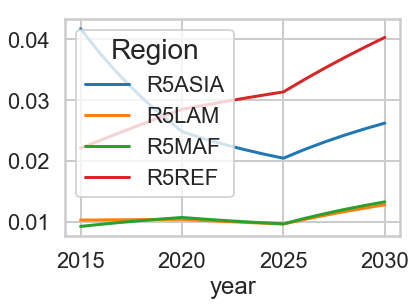

In [18]:
best_scenario = investments.investments_over_gdp.unstack("Scenario")["2C"].unstack("Model")["POLES"]

best_scenario.unstack("Region").plot()

In [19]:
all_dev_countries = investments.sum(level=["Model", "Scenario","year"]).drop(["investments_over_gdp"],axis=1).copy()

In [20]:
all_dev_countries["investments_over_gdp"] = all_dev_countries['Elec_tot_inv']/all_dev_countries['GDP|MER']

In [21]:
100*all_dev_countries.investments_over_gdp.mean(level=["Model","Scenario"])

Model              Scenario
AIM/CGE            2C          2.169828
                   BAU         1.279011
                   NDC         1.402218
IMAGE              2C          1.265186
                   BAU         1.413739
                   NDC         1.523479
MESSAGEix-GLOBIOM  2C          0.954170
                   BAU         0.876392
                   NDC         0.894304
POLES              2C          2.117365
                   BAU         1.911780
                   NDC         2.025414
REMIND-MAgPIE      2C          2.971555
                   BAU         2.382810
                   NDC         2.476985
WITCH-GLOBIOM      2C          1.633793
                   BAU         1.698672
                   NDC         1.769644
Name: investments_over_gdp, dtype: float64

C:\ProgramData\Anaconda3\envs\Julie1\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\envs\Julie1\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


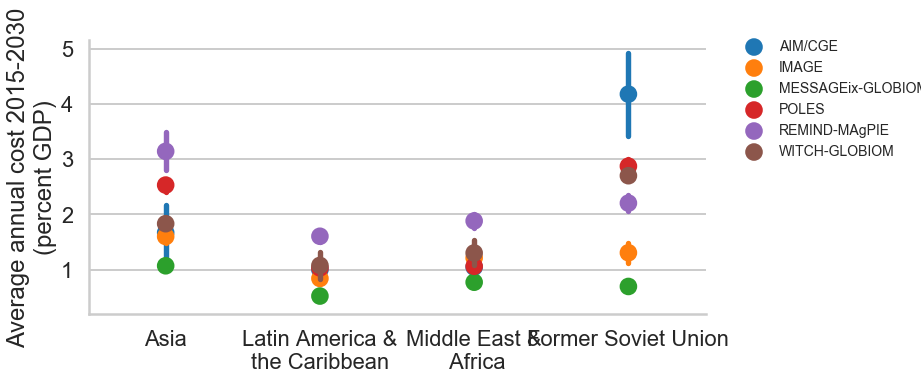

In [23]:
toplot = investments.investments_over_gdp.unstack("year").mean(axis=1).drop("R5OECD90+EU",level="Region")
toplot = toplot.reset_index().rename(columns={0:"investments_over_gdp"})

toplot['investments_over_gdp'] = 100*toplot.investments_over_gdp

toplot["Region"] = toplot.Region.replace({"R5ASIA":"Asia",\
                                         "R5LAM":"Latin America &\nthe Caribbean",\
                                         "R5MAF":"Middle East &\n Africa",\
                                         "R5OECD90+EU":"High income",\
                                         "R5REF":"Former Soviet Union"})

g = sns.factorplot(x='Region',y='investments_over_gdp', data=toplot,hue='Model', kind="point",dodge=False, join=False, size=6, aspect=1.7,ci="sd",\
                  markers="o",legend=False)

g.set_axis_labels("", "Average annual cost 2015-2030\n(percent GDP)")
g.add_legend(title="",fontsize = 14, bbox_to_anchor=(1, 0.65), borderaxespad=0.)

In [24]:
toplot[(toplot.Model=="POLES")&(toplot.Scenario=="2C")]

,Model,Region,Scenario,investments_over_gdp
36,POLES,Asia,2C,2.667893
39,POLES,Latin America &\nthe Caribbean,2C,1.061956
42,POLES,Middle East &\n Africa,2C,1.064083
45,POLES,Former Soviet Union,2C,3.050376


In [26]:
toplot[(toplot.Model=="MESSAGEix-GLOBIOM")&(toplot.Scenario=="BAU")]

,Model,Region,Scenario,investments_over_gdp
25,MESSAGEix-GLOBIOM,Asia,BAU,1.026128
28,MESSAGEix-GLOBIOM,Latin America &\nthe Caribbean,BAU,0.512413
31,MESSAGEix-GLOBIOM,Middle East &\n Africa,BAU,0.744235
34,MESSAGEix-GLOBIOM,Former Soviet Union,BAU,0.684137


In [27]:
toplot[(toplot.Model=="REMIND-MAgPIE")&(toplot.Scenario=="2C")]

,Model,Region,Scenario,investments_over_gdp
48,REMIND-MAgPIE,Asia,2C,3.625270
51,REMIND-MAgPIE,Latin America &\nthe Caribbean,2C,1.742584
54,REMIND-MAgPIE,Middle East &\n Africa,2C,2.050931
57,REMIND-MAgPIE,Former Soviet Union,2C,2.404724


In [48]:
maint = investments.maintenance_over_gdp.unstack("year").mean(axis=1).drop("R5OECD90+EU",level="Region")
maint = maint.reset_index().rename(columns={0:"maintenance_over_gdp"})

maint['maintenance_over_gdp'] = 100*maint.maintenance_over_gdp

maint["Region"] = maint.Region.replace({"R5ASIA":"Asia",\
                                         "R5LAM":"Latin America &\nthe Caribbean",\
                                         "R5MAF":"Middle East &\n Africa",\
                                         "R5OECD90+EU":"High income",\
                                         "R5REF":"Former Soviet Union"})

In [50]:
maint[(maint.Model=="MESSAGEix-GLOBIOM")&(maint.Scenario=="BAU")]

,Model,Region,Scenario,maintenance_over_gdp
25,MESSAGEix-GLOBIOM,Asia,BAU,0.401385
28,MESSAGEix-GLOBIOM,Latin America &\nthe Caribbean,BAU,0.124412
31,MESSAGEix-GLOBIOM,Middle East &\n Africa,BAU,0.217516
34,MESSAGEix-GLOBIOM,Former Soviet Union,BAU,0.278791


In [51]:
maint[(maint.Model=="REMIND-MAgPIE")&(maint.Scenario=="2C")]

,Model,Region,Scenario,maintenance_over_gdp
48,REMIND-MAgPIE,Asia,2C,0.727787
51,REMIND-MAgPIE,Latin America &\nthe Caribbean,2C,0.206127
54,REMIND-MAgPIE,Middle East &\n Africa,2C,0.239152
57,REMIND-MAgPIE,Former Soviet Union,2C,0.459323
